In [3]:
import pandas as pd
import numpy as np
from Functions import Cleaning_Functions
from sklearn import model_selection, linear_model, neighbors, preprocessing, metrics, ensemble

fun = Cleaning_Functions()

clean = pd.read_csv("../data/clean.csv")


In [4]:
def standarize_data(df):
        """
        Input: a dataset
        action: returns numeric column values scaled by mean and standard deviation
        """
        numeric_data = df.select_dtypes(include=['float64', 'int64'])
        for i in numeric_data.columns:
            df[i] = (df[i] - df[i].mean())/df[i].std()
        return df

In [5]:
market_data = fun.delete_id_columns(clean) #1
market_data, pred_market = fun.drop_response_rows_with_NAs(market_data, "Market_Orientation", "PPI_Likelihood") #2
market_data = fun.replace_NAN_with_na(market_data) #3
market_data = fun.entry_to_lowercase(market_data) #4
market_data = fun.remove_underscores_spaces(market_data) #5
market_data = fun.convert_to_categorical(market_data) #6
market_data = fun.impute_data(market_data)
market_data = standarize_data(market_data)


In [6]:
#Ana's fuc
def get_dummyXs_y(df, y_var):
    
    y = df[y_var]
    X  = df.drop(y_var, axis = 1)
    X_cat = X.select_dtypes(include = ["category", "O"])
    X_num = X.select_dtypes(include=['float64', 'int64'])
    
    X_cat_dummy = pd.get_dummies(X_cat)
    newX = pd.concat([X_num, X_cat_dummy], axis = 1)
    
    return newX, y

In [7]:
X, y = get_dummyXs_y(market_data, "Market_Orientation")
X_tr, X_te, y_tr, y_te = model_selection.train_test_split(X,y, test_size = 0.3, random_state = 50)


In [8]:
def fit_predict(clf, X_tr, X_te, y_tr, y_te):
    clf.fit(X_tr,y_tr)
    pred = clf.predict(X_te)
    mse = metrics.mean_squared_error(y_te, pred)
    
    return "MSE: {} ".format(mse)



def tune_parameters(X_train, y_train, clf, param_dict, cv=5):
    
   
    
    best_model = model_selection.GridSearchCV(clf, param_dict, cv=cv, scoring = "neg_mean_squared_error", n_jobs =-1, verbose=3)
    
    best_model.fit(X_train, y_train)
    
    print("Best Parameters: {} \n Training MSE: {} \n Parameter Index: {}".format(best_model.best_params_,best_model.best_score_,best_model.best_index_) ) # best is alpha = 0


    #uses gridsearch, prints best parameters, best model, its MSE on the training set
    #returns classifer
    
    return clf

test_mse_market = []

Market Orientation
=======

## Random Forest Model

In [9]:
forest_model = ensemble.RandomForestRegressor()
fit_predict(forest_model, X_tr, X_te, y_tr, y_te)

parameters = dict()
parameters = {'n_estimators':(np.arange(100, 300, 50)), 'max_depth': [10,20, 50], 'max_features':["auto", "sqrt", "log2"]}

best_forest = tune_parameters( X_tr, y_tr,forest_model, parameters)

forest_pred = best_forest.predict(X_te)
forest_test_mse_market = metrics.mean_squared_error(y_te, forest_pred)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\chris\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-09fbfce9c43f>", line 2, in <module>
    fit_predict(forest_model, X_tr, X_te, y_tr, y_te)
  File "<ipython-input-8-a0d0989f4cb6>", line 2, in fit_predict
    clf.fit(X_tr,y_tr)
  File "C:\Users\chris\Miniconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 383, in fit
    for i, t in enumerate(trees))
  File "C:\Users\chris\Miniconda3\lib\site-packages\joblib\parallel.py", line 1007, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\chris\Miniconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\chris\Miniconda3\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\chris\Miniconda3\lib\site

KeyboardInterrupt: 

In [ ]:
test_mse.append("Random Forrest Test MSE:{}".format(forest_test_mse))

print("Test MSE: {}".format(metrics.mean_squared_error(y_te, forest_pred)))

In [ ]:

forest_importances = pd.Series(best_forest.feature_importances_, index=X.columns).sort_values(ascending=False)
forest_importances


## XG Boosting Model

In [ ]:
XG_model = ensemble.GradientBoostingRegressor()
fit_predict(XG_model, X_tr, X_te, y_tr, y_te)


parameters = dict()
parameters = {'n_estimators':(np.arange(100, 300, 50)), 'max_depth': [10,20,50]}

best_XG = tune_parameters( X_tr, y_tr,XG_model, parameters)

XG_pred = best_XG.predict(X_te)
XG_test_mse = metrics.mean_squared_error(y_te, XG_pred)


test_mse_market.append("XGBoost Test MSE:{}".format(XG_test_mse))

print("Test MSE: {}".format(metrics.mean_squared_error(y_te, XG_pred)))

In [ ]:

XG_importances = pd.Series(best_XG.feature_importances_, index=X.columns).sort_values(ascending=False)
XG_importances


PPI_Likelihood
=====

In [10]:
PPI_data = fun.delete_id_columns(clean) #1
PPI_data, pred_PPI = fun.drop_response_rows_with_NAs(PPI_data, "PPI_Likelihood", "Market_Orientation") #2
PPI_data = fun.replace_NAN_with_na(PPI_data) #3
PPI_data = fun.entry_to_lowercase(PPI_data) #4
PPI_data = fun.remove_underscores_spaces(PPI_data) #5
PPI_data = fun.convert_to_categorical(PPI_data) #6
PPI_data = fun.impute_data(PPI_data)
PPI_data = standarize_data(PPI_data)


X, y = get_dummyXs_y(PPI_data, "PPI_Likelihood")
X_tr, X_te, y_tr, y_te = model_selection.train_test_split(X,y, test_size = 0.3, random_state = 50)

test_mse_ppi = []

In [ ]:
forest_model = ensemble.RandomForestRegressor()
fit_predict(forest_model, X_tr, X_te, y_tr, y_te)

parameters = dict()
parameters = {'n_estimators':(np.arange(100, 300, 50)), 'max_depth': [10,20, 50]}

best_forest = tune_parameters( X_tr, y_tr,forest_model, parameters)

forest_pred = best_forest.predict(X_te)
forest_test_mse_ppi = metrics.mean_squared_error(y_te, forest_pred)

test_mse_ppi.append("Random Forrest Test MSE:{}".format(forest_test_mse_ppi))

print("Test MSE: {}".format(metrics.mean_squared_error(y_te, forest_pred)))

In [ ]:

forest_importances = pd.Series(best_forest.feature_importances_, index=X.columns).sort_values(ascending=False)
forest_importances


In [ ]:
XG_model = ensemble.GradientBoostingRegressor()
fit_predict(XG_model, X_tr, X_te, y_tr, y_te)


parameters = dict()
parameters = {'n_estimators':(np.arange(100, 300, 20)), 'max_depth': [10,20,50]}

best_XG = tune_parameters( X_tr, y_tr,XG_model, parameters)

XG_pred = best_XG.predict(X_te)
XG_test_mse = metrics.mean_squared_error(y_te, XG_pred)

test_mse_ppi.append("XGBoost Test MSE:{}".format(XG_test_mse))

print("Test MSE: {}".format(metrics.mean_squared_error(y_te, XG_pred)))

In [ ]:
XG_importances = pd.Series(best_XG.feature_importances_, index=X.columns).sort_values(ascending=False)
XG_importances


## Country Specific PPI Likeilhood

In [11]:
#produces a dictionary of country specific dataframes
country_dict={}
for country in PPI_data["Country"].values.unique():
    new_df = PPI_data[PPI_data["Country"].values  == country]
    country_dict[country] = new_df

In [12]:
#wrapper func
def country_model(country, y, clf, parameter_dict):
    """
    INPUT
    country: str, country name as appears in dataframe
    y: str, column name of response
    clf: scikitlearn clf, the scikit learn model to train 
    parameter_dict: dict, dictionary of model parameters
    
    OUTPUT
    country: str, country name as appears in dataframe
    clf: trained best model
    mse: test mse for this model
    index: the list of dummy varaible columns for that country
    """
    X,y = get_dummyXs_y(country_dict[country], y)
    X_tr,X_te,y_tr,y_te = model_selection.train_test_split(X,y, test_size=0.3, random_state=50)
    
    index = X.columns
    fit_predict(clf, X_tr,X_te,y_tr,y_te)
    
    best_clf = tune_parameters(X_tr, y_tr, clf, parameter_dict)
    
    best_pred = best_clf.predict(X_te)
    mse = metrics.mean_squared_error(y_te, best_pred)
    print(best_clf.feature_importances_.sort())
    print("\n \n {} \n Test MSE: {}".format(country, mse))
    
    return country, best_clf.feature_importances_, mse, index

In [ ]:
country_dict["ghana"].shape

In [13]:
forest_model = ensemble.RandomForestRegressor()
parameters= {'n_estimators':(np.arange(100, 300, 50)), 'max_depth': [10,20, 50]}

#
#name, ghana_forrest, ghana_mse, index = country_model(country_dict["ghana"], "PPI_Likelihood",forest_model,parameters)
#for key in country_dict:


country_results= {}
for country in PPI_data["Country"].values.unique():
    country_results[country] =country_model(country,
                          "PPI_Likelihood",
                          forest_model,
                          parameters)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.2min finished


Best Parameters: {'max_depth': 50, 'n_estimators': 150} 
 Training MSE: -0.48457006265768543 
 Parameter Index: 9
None

 
 tanzania 
 Test MSE: 0.4858331694100473
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.4s finished


Best Parameters: {'max_depth': 20, 'n_estimators': 150} 
 Training MSE: -0.008835719622391528 
 Parameter Index: 5
None

 
 guatemala 
 Test MSE: 0.005539314760343996
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.6s finished


Best Parameters: {'max_depth': 10, 'n_estimators': 150} 
 Training MSE: -0.5368390600999549 
 Parameter Index: 1
None

 
 honduras 
 Test MSE: 0.3184651082480473
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.2s finished


Best Parameters: {'max_depth': 10, 'n_estimators': 150} 
 Training MSE: -0.6731417737395647 
 Parameter Index: 1
None

 
 elsalvador 
 Test MSE: 0.779514913036469
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   17.3s finished


Best Parameters: {'max_depth': 20, 'n_estimators': 150} 
 Training MSE: -0.16478909263496994 
 Parameter Index: 5
None

 
 mali 
 Test MSE: 0.2009224498716473
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.1min finished


Best Parameters: {'max_depth': 20, 'n_estimators': 200} 
 Training MSE: -0.5833186643479025 
 Parameter Index: 6
None

 
 burkinafaso 
 Test MSE: 0.6252580894926539
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.2s finished


Best Parameters: {'max_depth': 50, 'n_estimators': 150} 
 Training MSE: -0.2545676251480222 
 Parameter Index: 9
None

 
 malawi 
 Test MSE: 0.3456604273444897
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   32.3s finished


Best Parameters: {'max_depth': 20, 'n_estimators': 150} 
 Training MSE: -0.22583836687392972 
 Parameter Index: 5
None

 
 kenya 
 Test MSE: 0.24437195798236439
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.7s finished


Best Parameters: {'max_depth': 50, 'n_estimators': 100} 
 Training MSE: -0.06301302558796684 
 Parameter Index: 8
None

 
 india 
 Test MSE: 0.05043477568247128
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   16.2s finished


Best Parameters: {'max_depth': 10, 'n_estimators': 200} 
 Training MSE: -0.2728282177512675 
 Parameter Index: 2
None

 
 cambodia 
 Test MSE: 0.31868136363170907
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.9s finished


Best Parameters: {'max_depth': 20, 'n_estimators': 250} 
 Training MSE: -0.466117997116741 
 Parameter Index: 7
None

 
 vietnam 
 Test MSE: 0.3122132770957117
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   20.5s finished


Best Parameters: {'max_depth': 20, 'n_estimators': 100} 
 Training MSE: -0.15123953778471272 
 Parameter Index: 4
None

 
 ethiopia 
 Test MSE: 0.16964695553047515
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.9s finished


Best Parameters: {'max_depth': 10, 'n_estimators': 250} 
 Training MSE: -0.28384295872198245 
 Parameter Index: 3
None

 
 zambia 
 Test MSE: 0.2169963886347653
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   16.0s finished


Best Parameters: {'max_depth': 10, 'n_estimators': 250} 
 Training MSE: -0.07525934503950109 
 Parameter Index: 3
None

 
 ghana 
 Test MSE: 0.07816898445123278
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.9s finished


Best Parameters: {'max_depth': 10, 'n_estimators': 150} 
 Training MSE: -0.25563558726889285 
 Parameter Index: 1
None

 
 uganda 
 Test MSE: 0.18494655779143807
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.2s finished


Best Parameters: {'max_depth': 10, 'n_estimators': 250} 
 Training MSE: -0.0070197373979414305 
 Parameter Index: 3
None

 
 peru 
 Test MSE: 0.013734802779952373


In [99]:
country_feature = {}
for country in country_results:
    country_feature[country] = pd.Series(country_results[country][1], 
                                      index=country_results[country][3].values).sort_values(ascending=False)



In [100]:
country_feature[1:10]

TypeError: unhashable type: 'slice'

In [138]:
def plot_country_feature(country, ax1):
    country_feature[country][1:10].plot(kind="bar", 
                                   title = "Most Important Features: {}".format(country), 
                                   ylabel = "Features",
                                   xlabel = "Importance Metric", ax=ax1)
    
        


In [142]:
for country in country_feature:
    print(country)

tanzania
guatemala
honduras
elsalvador
mali
burkinafaso
malawi
kenya
india
cambodia
vietnam
ethiopia
zambia
ghana
uganda
peru


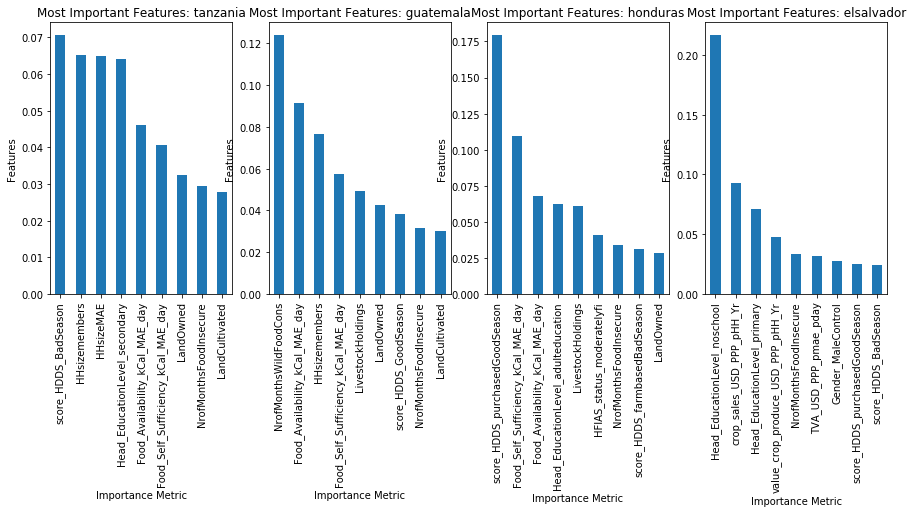

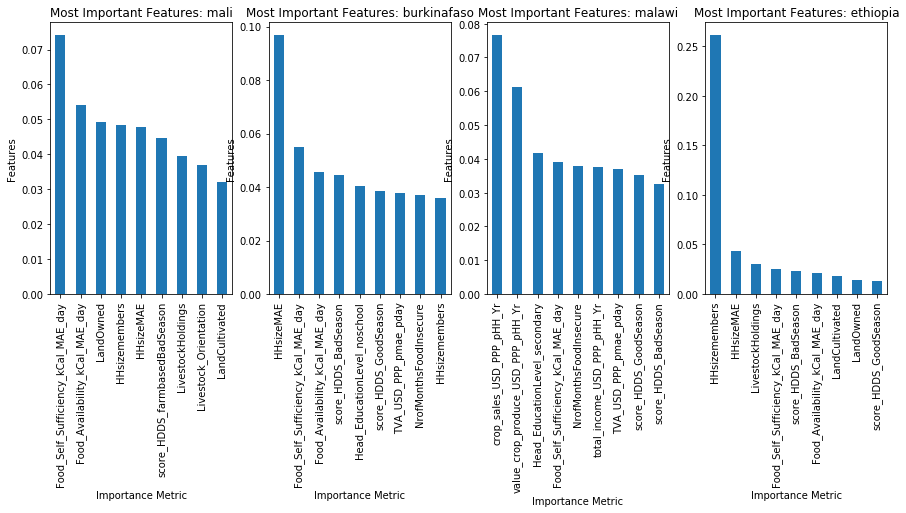

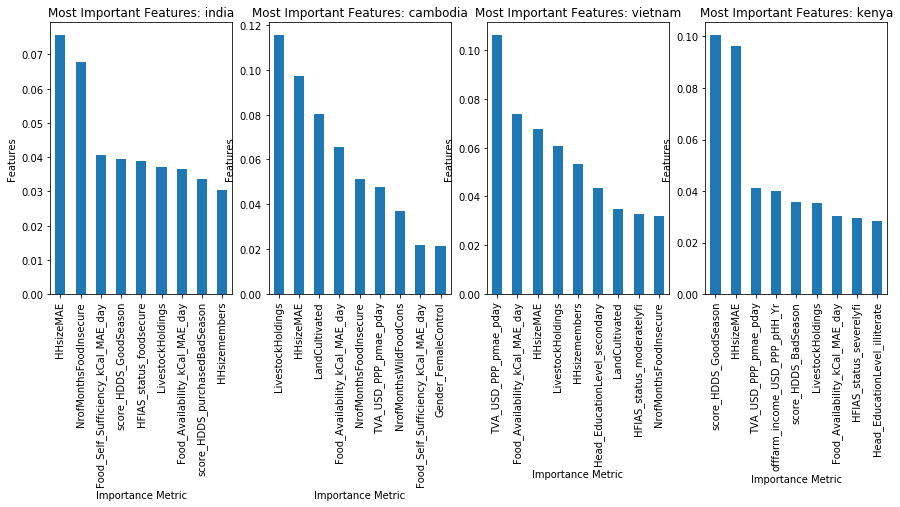

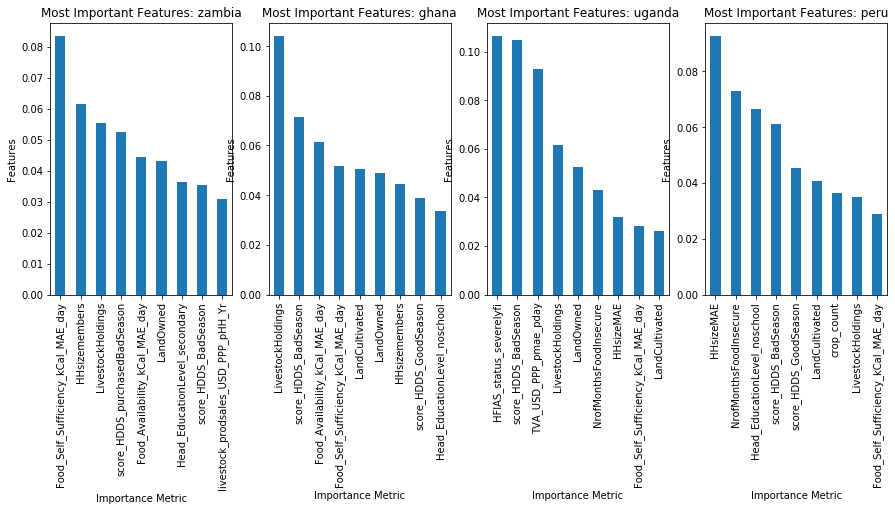

In [145]:
import matplotlib.pyplot as plt
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5), 
                             sharex=False)
plot_country_feature("tanzania", ax1=ax1)
plot_country_feature("guatemala", ax1=ax2)
plot_country_feature("honduras", ax1=ax3)
plot_country_feature("elsalvador", ax1=ax4)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5), 
                             sharex=False)
plot_country_feature("mali", ax1=ax1)
plot_country_feature("burkinafaso", ax1=ax2)
plot_country_feature("malawi", ax1=ax3)
plot_country_feature("ethiopia", ax1=ax4)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5), 
                             sharex=False)
plot_country_feature("india", ax1=ax1)
plot_country_feature("cambodia", ax1=ax2)
plot_country_feature("vietnam", ax1=ax3)
plot_country_feature("kenya", ax1=ax4)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5), 
                             sharex=False)
plot_country_feature("zambia", ax1=ax1)
plot_country_feature("ghana", ax1=ax2)
plot_country_feature("uganda", ax1=ax3)
plot_country_feature("peru", ax1=ax4)